## Exploring Unsupervised Machine Learning
Here, we will be seeing the use of K-Means Clustering Technique.
- K-Mean clustering is an unsupervised learning algorithm that finds fixed number(k) of clusters in a set of data.
- A cluster is a groupof data points that are grouped together due to similarities in their features.
---
### K-Means Clustering
In this task, we will predict the optimum number of clusters and represent it visually for "iris" dataset.

### Importing necessary libraries

In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

In [24]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

### Loading the data

In [16]:
# Loading the iris dataset
iris = datasets.load_iris()

In [15]:
# Creating dataframe for the iris dataset
df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Creating Data Audit Report

In [19]:
# Using a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P25' ,'P50' ,'P75' ,'P99' ,'MAX'])

df_summary = df.apply(lambda x: var_summary(x)).T

In [20]:
df_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P25,P50,P75,P99,MAX
sepal length (cm),150.0,0.0,876.5,5.843333,5.80,0.828066,0.685694,4.3,4.400,5.1,5.80,6.4,7.700,7.9
sepal width (cm),150.0,0.0,458.1,3.054000,3.00,0.433594,0.188004,2.0,2.200,2.8,3.00,3.3,4.151,4.4
petal length (cm),150.0,0.0,563.8,3.758667,4.35,1.764420,3.113179,1.0,1.149,1.6,4.35,5.1,6.700,6.9
petal width (cm),150.0,0.0,179.8,1.198667,1.30,0.763161,0.582414,0.1,0.100,0.3,1.30,1.8,2.500,2.5


In [21]:
# Correlation Matrix
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


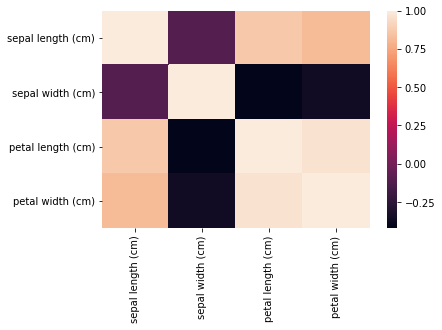

In [22]:
# Visualizing the correlation matrix in seaborn using heatmap

sns.heatmap(df.corr())

**NOTE** ->  Here we are using **Elbow Analysis** method to find the optimum number of clusters.

### Elbow Analysis
This method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [30]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df )
    cluster_errors.append( clusters.inertia_ )

In [35]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.930963
6,7,34.299986
7,8,30.031193
8,9,28.249742
9,10,26.454616


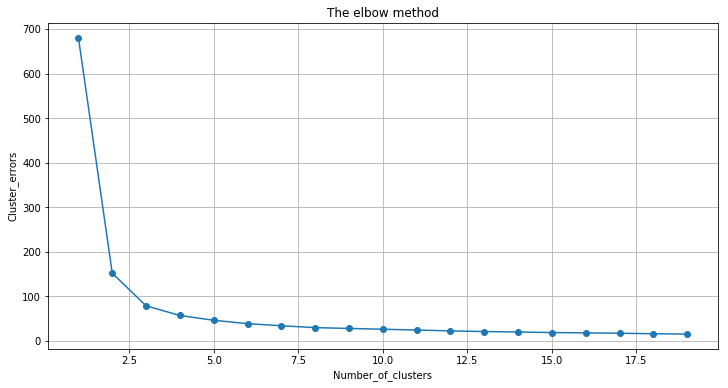

In [39]:
# Allow plots to appear in the notebook

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('The elbow method')
plt.xlabel('Number_of_clusters')
plt.ylabel('Cluster_errors') 
plt.show()

### Note :
The optimum number of clusters is where the elbow occurs and when the sum of square of error within cluster doesn't decrease significantly with every iteration.


***Conclusion*** - The elbow diagram shows that the gain in explained variance reduces significantly from 2 to 3 but shows no significant difference at later iterations. So optimum number of clusters will be ** '3' **.

### Creating KMeans classifier

In [56]:
km_3 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
km_3 = km_3.fit(df)

In [68]:
# Number of data points in each cluster
pd.Series.sort_index(df.cluster_3.value_counts())

0    38
1    50
2    62
Name: cluster_3, dtype: int64

In [66]:
y_kmeans = km_3.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [61]:
# Concatenating above labels found through Kmeans with data 
df['cluster_3'] = km_3.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_3
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Now we might want to visualize the clusters.

### Visualizing the clusters for sepal length and sepal width

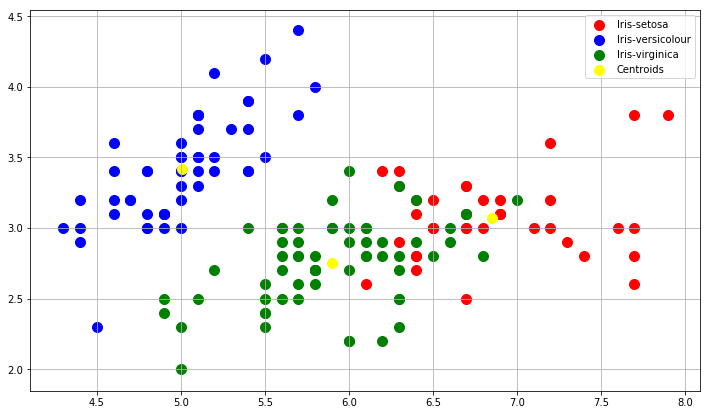

In [91]:
plt.figure(figsize=(12,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

### Visualizing the clusters for petal length and petal width

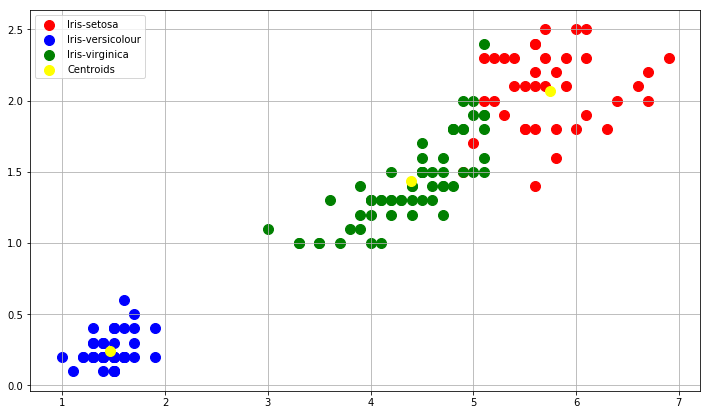

In [90]:
plt.figure(figsize=(12,7))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km_3.cluster_centers_[:, 2], km_3.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()